<a href="https://colab.research.google.com/github/cHackogp/COVID-19/blob/master/COVID_19_Global_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing needed packages
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

from scipy import  stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Reading datasets
submissions = pd.read_csv("/content/drive/My Drive/Projects/COVID-19/submission.csv")
final_test_data = pd.read_csv("/content/drive/My Drive/Projects/COVID-19/test.csv")
train_data = pd.read_csv("/content/drive/My Drive/Projects/COVID-19/train.csv")

In [0]:
# Testing code b[]lock
#test_data.shape.index(testing_data.)



In [0]:
# Exploratory Data Analysis

In [0]:
#Function that gives basic details about a csv fie
def basicDetails(csv_file):
  print("\nBasic Info:")
  print(csv_file.info())
  print("\nDescription:\n",csv_file.describe())
  print("\nShape: ",csv_file.shape)
  print("\nFirst 10 elemtns:\n",csv_file.head(10))

In [84]:
print("\nsubmission.csv file details:\n")
basicDetails(submissions)


submission.csv file details:


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13158 entries, 0 to 13157
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ForecastId      13158 non-null  int64
 1   ConfirmedCases  13158 non-null  int64
 2   Fatalities      13158 non-null  int64
dtypes: int64(3)
memory usage: 308.5 KB
None

Description:
          ForecastId  ConfirmedCases  Fatalities
count  13158.000000         13158.0     13158.0
mean    6579.500000             1.0         1.0
std     3798.531756             0.0         0.0
min        1.000000             1.0         1.0
25%     3290.250000             1.0         1.0
50%     6579.500000             1.0         1.0
75%     9868.750000             1.0         1.0
max    13158.000000             1.0         1.0

Shape:  (13158, 3)

First 10 elemtns:
    ForecastId  ConfirmedCases  Fatalities
0           1               1           1
1           2    

In [85]:
print("\nfinal_test_data.csv file details:\n")
basicDetails(final_test_data)


final_test_data.csv file details:


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13158 entries, 0 to 13157
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ForecastId      13158 non-null  int64 
 1   Province_State  5590 non-null   object
 2   Country_Region  13158 non-null  object
 3   Date            13158 non-null  object
dtypes: int64(1), object(3)
memory usage: 411.3+ KB
None

Description:
          ForecastId
count  13158.000000
mean    6579.500000
std     3798.531756
min        1.000000
25%     3290.250000
50%     6579.500000
75%     9868.750000
max    13158.000000

Shape:  (13158, 4)

First 10 elemtns:
    ForecastId Province_State Country_Region        Date
0           1            NaN    Afghanistan  2020-03-26
1           2            NaN    Afghanistan  2020-03-27
2           3            NaN    Afghanistan  2020-03-28
3           4            NaN    Afghanistan  2020-03-29
4      

In [86]:
# some baisc info on non-numerical attributes
print("\nProvince_State value counts:\n",final_test_data.Province_State.value_counts())
print("\nCountry_Region value counts:\n",final_test_data.Country_Region.value_counts())
print("\nDate Range:\t", final_test_data.Date.min(), " -", final_test_data.Date.max())


Province_State value counts:
 Hunan                       43
California                  43
Nova Scotia                 43
French Guiana               43
Victoria                    43
                            ..
New Mexico                  43
New Hampshire               43
Mayotte                     43
Pennsylvania                43
Turks and Caicos Islands    43
Name: Province_State, Length: 130, dtype: int64

Country_Region value counts:
 US                2322
China             1419
Canada             516
France             430
United Kingdom     430
                  ... 
Ghana               43
Malta               43
Mali                43
Sri Lanka           43
Bhutan              43
Name: Country_Region, Length: 180, dtype: int64

Date Range:	 2020-03-26  - 2020-05-07


In [87]:
print("\ntrain_data.csv file details:\n")
basicDetails(train_data)


train_data.csv file details:


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22338 entries, 0 to 22337
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              22338 non-null  int64  
 1   Province_State  9490 non-null   object 
 2   Country_Region  22338 non-null  object 
 3   Date            22338 non-null  object 
 4   ConfirmedCases  22338 non-null  float64
 5   Fatalities      22338 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.0+ MB
None

Description:
                  Id  ConfirmedCases    Fatalities
count  22338.000000    22338.000000  22338.000000
mean   16354.500000      610.647372     26.520906
std     9451.985843     5150.283215    354.743581
min        1.000000        0.000000      0.000000
25%     8169.250000        0.000000      0.000000
50%    16354.500000        0.000000      0.000000
75%    24539.750000       45.000000      0.000000
max   

In [88]:
# some baisc info on non-numerical attributes
print("\nProvince_State value counts:\n",train_data.Province_State.value_counts())
print("\nCountry_Region value counts:\n",train_data.Country_Region.value_counts())
print("\nDate Range:\t", train_data.Date.min(), " -", train_data.Date.max())


Province_State value counts:
 Shandong             73
Aruba                73
New South Wales      73
Hainan               73
Tianjin              73
                     ..
Western Australia    73
Michigan             73
Hong Kong            73
St Martin            73
Guangdong            73
Name: Province_State, Length: 130, dtype: int64

Country_Region value counts:
 US                     3942
China                  2409
Canada                  876
United Kingdom          730
France                  730
                       ... 
Antigua and Barbuda      73
Cote d'Ivoire            73
Peru                     73
Luxembourg               73
Guyana                   73
Name: Country_Region, Length: 180, dtype: int64

Date Range:	 2020-01-22  - 2020-04-03


In [89]:
# Percentage of null values in dataset
print(train_data.isnull().sum()  / len(train_data) * 100)

Id                 0.00000
Province_State    57.51634
Country_Region     0.00000
Date               0.00000
ConfirmedCases     0.00000
Fatalities         0.00000
dtype: float64


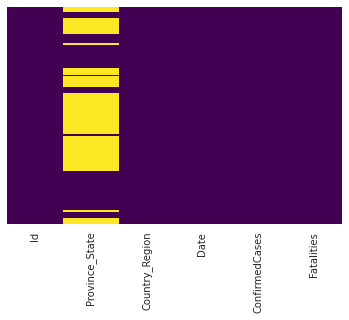

In [90]:
sns.heatmap(train_data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [0]:
# LabelEncoding to include non-numerical/ordinal data into machine learning.
gle = LabelEncoder()
#Province_State
province_state_label = gle.fit_transform(train_data['Province_State'].astype(str))
#Country_Region
country_region_label = gle.fit_transform(train_data['Country_Region'].astype(str))
#Date
date_label = gle.fit_transform(train_data['Date'])

In [0]:
train_data_label = train_data
train_data_label['Province_State_Label'] = province_state_label
train_data_label['Country_Region_Label'] = country_region_label
train_data_label['Date_Label'] = date_label

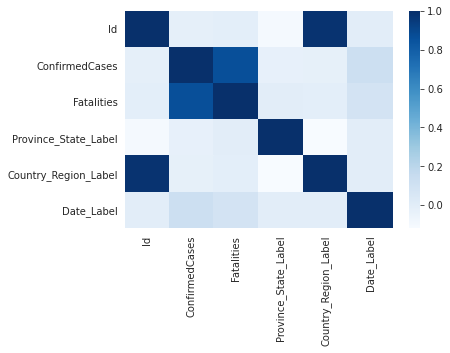

In [93]:
# Check for correleation
plt.figure(figsize=(6,4))
sns.heatmap(train_data_label.corr(),cmap='Blues',annot=False) 

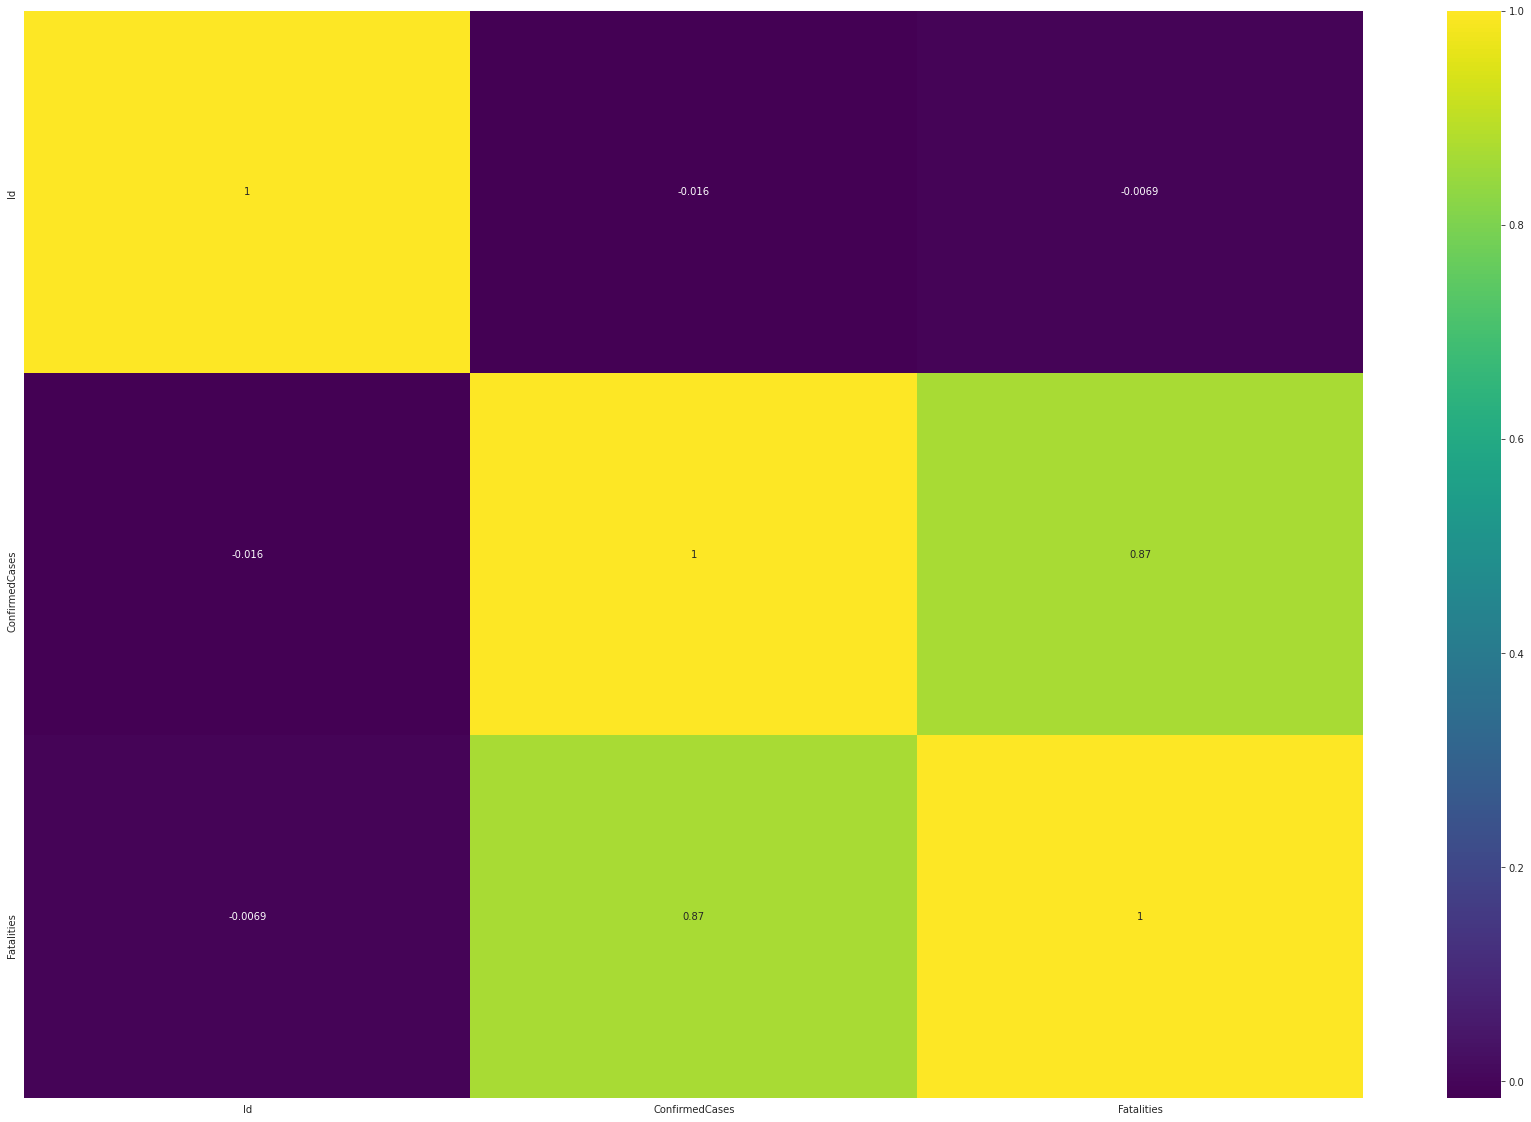

In [98]:
#Correlation Heatmap
plt.figure(figsize=(30,20))
sns.heatmap(train_data.corr(),cmap="viridis",annot=True, fmt='.2g')

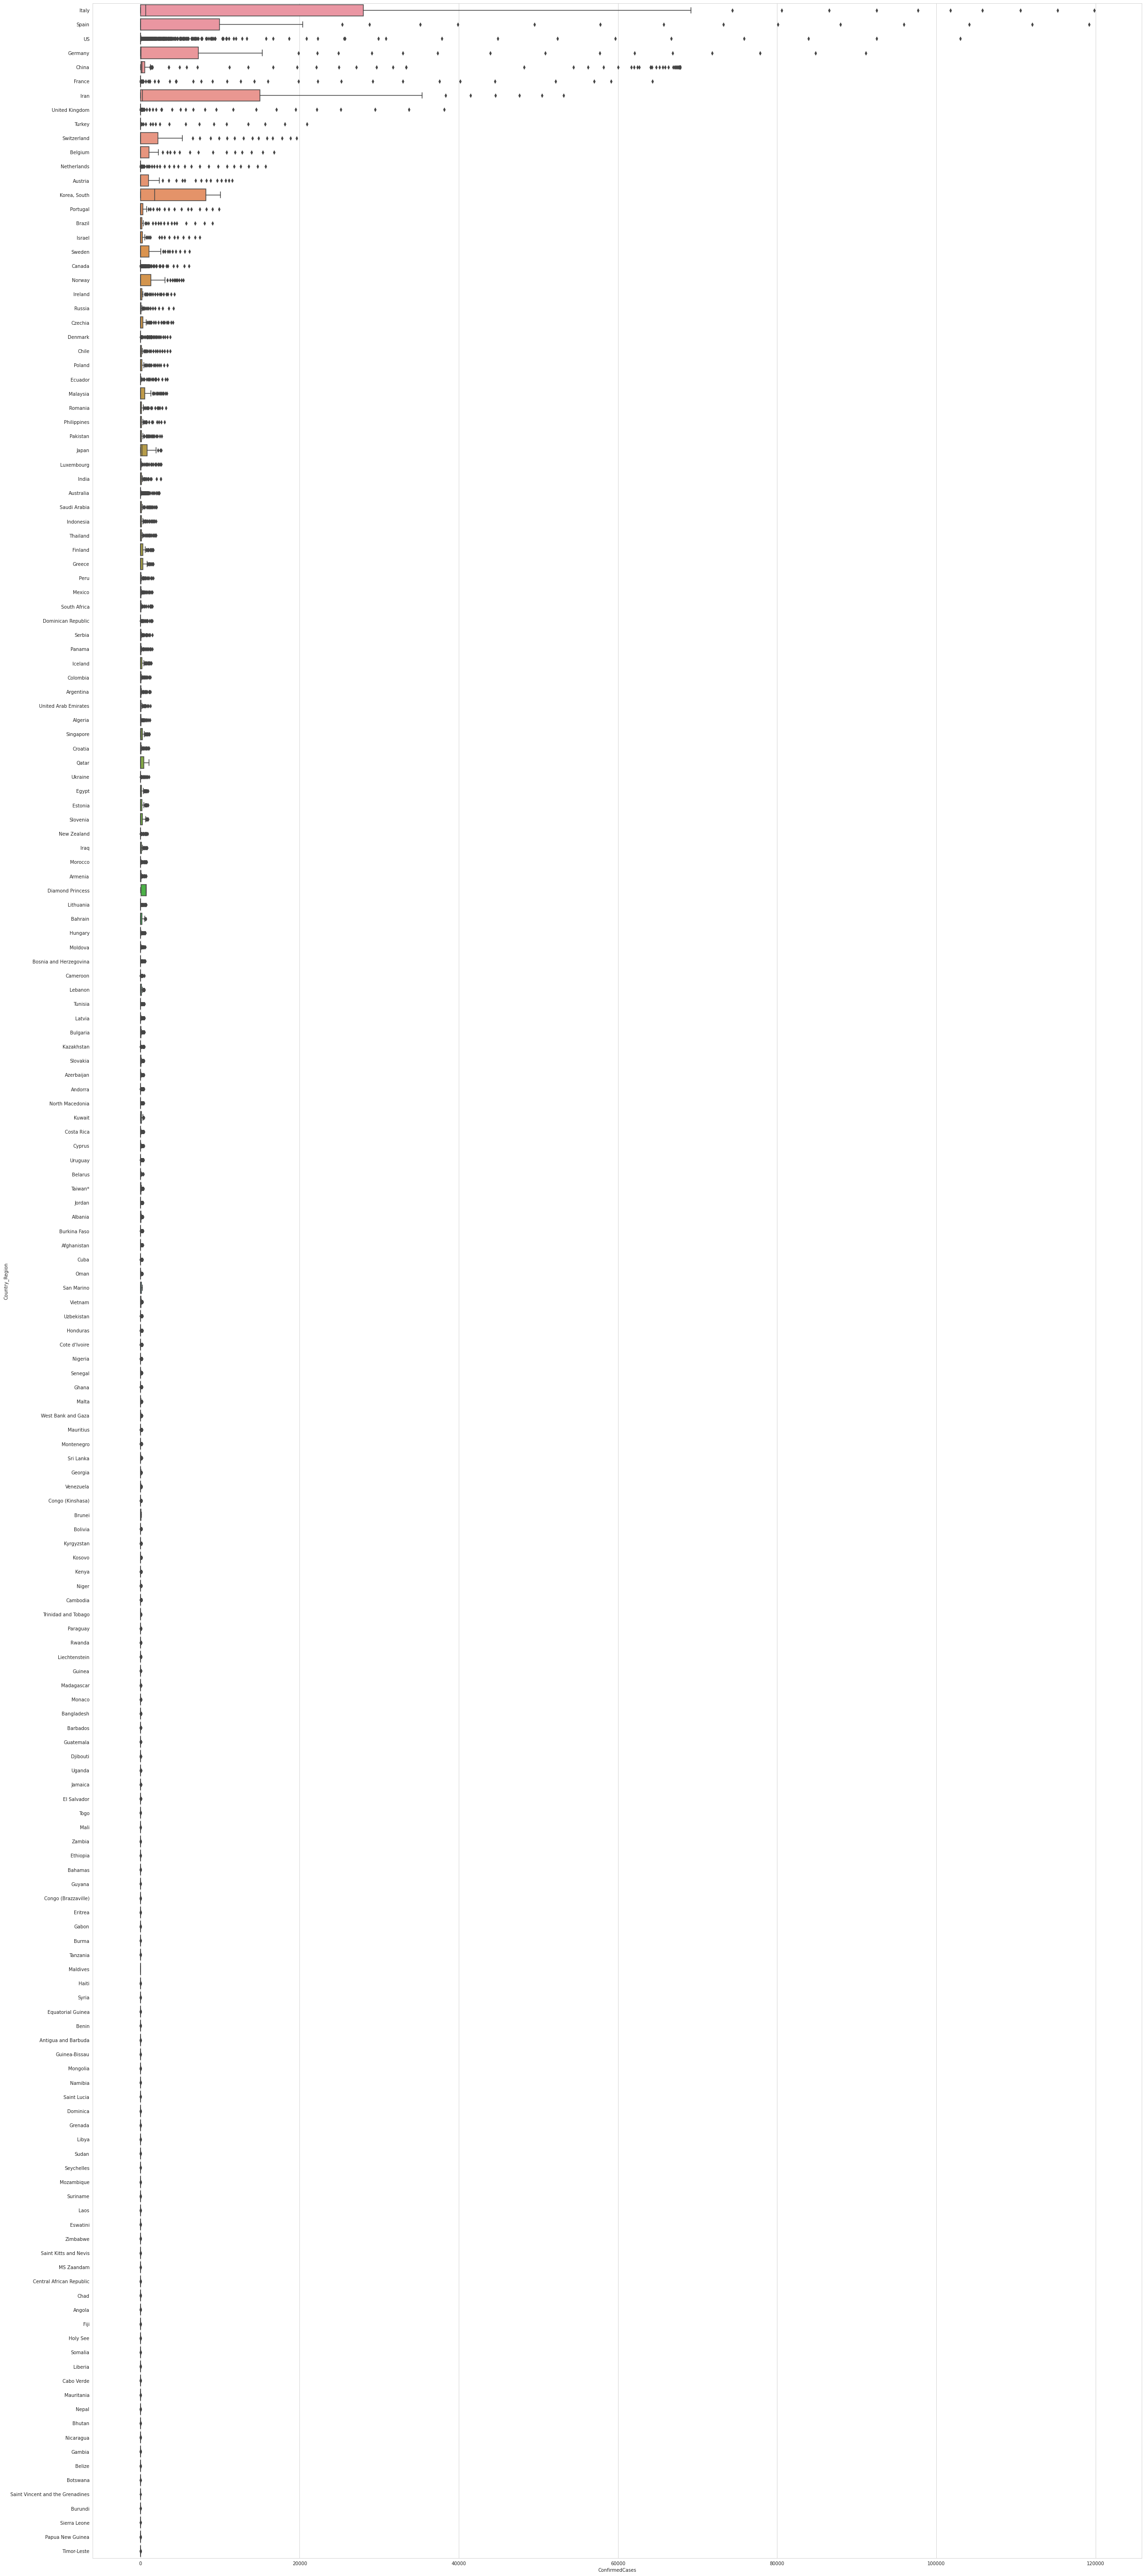

In [124]:
# Boxplot for ConfirmedCases Per country/Region
fig = plt.figure(figsize=[40,100])
sns.boxplot(x='ConfirmedCases', y='Country_Region', data=train_data.sort_values('ConfirmedCases',ascending=False))

In [108]:
# Check for outliers
l = train_data.descibe().columns.values
number_of_columns = len(l)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(train_data[l[i]],color='green',orient='v')
    plt.tight_layout()

AttributeError: ignored

In [0]:
# splitting the dataset into training and testing data
training_data, testing_data = train_test_split(train_data, test_size=0.33, random_state=3333)

# shape of the dataset
print('\nShape of training data :',training_data.shape)
print('\nShape of testing data :',testing_data.shape)

In [0]:
# Predicting using Mean

def predictionMean(target_variable): # Function that predicts the missing target variable in the test data using mean
    print("\nTarget variable: ",target_variable)
    # Target variable ; Test with - ConfirmedCases, Fatalities
    train_y = training_data[target_variable]
    test_y = testing_data[target_variable]

    print("\nMean of Target Variable : ", train_y.mean())

    # predict the target on the test dataset
    predict_train = [train_y.mean() for i in range(train_y.shape[0])]

    # Root Mean Squared Error on training dataset
    rmse_train = mean_squared_error(train_y,predict_train)**(0.5)
    print('\nRMSE on train dataset : ', rmse_train)

    # predict the target on the testing dataset
    predict_test = [train_y.mean() for i in range(test_y.shape[0])]

    # Root Mean Squared Error on testing dataset
    rmse_test = mean_squared_error(test_y,predict_test)**(0.5)
    print('\nRMSE on test dataset : ', rmse_test)

    # Root Mean Squared Logarithmic Error
    rmsle = np.sqrt(mean_squared_log_error( test_y, predict_test))
    print("\nRMSLE on test dataset :", rmsle)

predictionMean("ConfirmedCases")
predictionMean("Fatalities")

In [0]:
# Predicting using average cases and fatalities by Location
country_region = testing_data['Country_Region'].unique()
testing_data